#Connecting the Drive#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/'

Mounted at /content/drive


#Reading the Train CSV and creating windows#

In [2]:
import pandas as pd

train = pd.read_csv(path + "train.csv", low_memory=False)

print(train)
print("\n\n")
print(train.isna().sum())

                  id        date  store_nbr  item_nbr  unit_sales onpromotion
0                  0  2013-01-01         25    103665         7.0         NaN
1                  1  2013-01-01         25    105574         1.0         NaN
2                  2  2013-01-01         25    105575         2.0         NaN
3                  3  2013-01-01         25    108079         1.0         NaN
4                  4  2013-01-01         25    108701         1.0         NaN
...              ...         ...        ...       ...         ...         ...
125497035  125497035  2017-08-15         54   2089339         4.0       False
125497036  125497036  2017-08-15         54   2106464         1.0        True
125497037  125497037  2017-08-15         54   2110456       192.0       False
125497038  125497038  2017-08-15         54   2113914       198.0        True
125497039  125497039  2017-08-15         54   2116416         2.0       False

[125497040 rows x 6 columns]



id                    0
date   

In [3]:
# print(train['date'].dtype)
train['date'] = pd.to_datetime(train['date'])
print(train)

                  id       date  store_nbr  item_nbr  unit_sales onpromotion
0                  0 2013-01-01         25    103665         7.0         NaN
1                  1 2013-01-01         25    105574         1.0         NaN
2                  2 2013-01-01         25    105575         2.0         NaN
3                  3 2013-01-01         25    108079         1.0         NaN
4                  4 2013-01-01         25    108701         1.0         NaN
...              ...        ...        ...       ...         ...         ...
125497035  125497035 2017-08-15         54   2089339         4.0       False
125497036  125497036 2017-08-15         54   2106464         1.0        True
125497037  125497037 2017-08-15         54   2110456       192.0       False
125497038  125497038 2017-08-15         54   2113914       198.0        True
125497039  125497039 2017-08-15         54   2116416         2.0       False

[125497040 rows x 6 columns]


In [5]:
stores = pd.read_csv(path + "stores.csv", low_memory=False)
quito_stores = stores.loc[stores['city'] == 'Quito', 'store_nbr']
# print(quito_stores)
filtered_train = train[train['store_nbr'].isin(quito_stores)]
print(filtered_train)

                  id       date  store_nbr  item_nbr  unit_sales onpromotion
578              578 2013-01-02          1    103665         2.0         NaN
579              579 2013-01-02          1    105574         8.0         NaN
580              580 2013-01-02          1    105575        15.0         NaN
581              581 2013-01-02          1    105577         2.0         NaN
582              582 2013-01-02          1    105737         2.0         NaN
...              ...        ...        ...       ...         ...         ...
125486923  125486923 2017-08-15         49   2122188         7.0       False
125486924  125486924 2017-08-15         49   2122676         2.0       False
125486925  125486925 2017-08-15         49   2122868         2.0       False
125486926  125486926 2017-08-15         49   2123727         1.0       False
125486927  125486927 2017-08-15         49   2124052         4.0       False

[51982641 rows x 6 columns]


In [6]:
df = filtered_train

# Parameters
window_size = 600000  # Number of consecutive rows in each window
step_size = 600000   # Number of rows to move the window

# Sliding window sampling
windows = [
    df.iloc[i:i + window_size]
    for i in range(0, len(df) - window_size + 1, step_size)
]

print(df)
print("\n\n")

for idx, window in enumerate(windows):
    print(f"Window {idx + 1}:\n{window}\n")

                  id       date  store_nbr  item_nbr  unit_sales onpromotion
578              578 2013-01-02          1    103665         2.0         NaN
579              579 2013-01-02          1    105574         8.0         NaN
580              580 2013-01-02          1    105575        15.0         NaN
581              581 2013-01-02          1    105577         2.0         NaN
582              582 2013-01-02          1    105737         2.0         NaN
...              ...        ...        ...       ...         ...         ...
125486923  125486923 2017-08-15         49   2122188         7.0       False
125486924  125486924 2017-08-15         49   2122676         2.0       False
125486925  125486925 2017-08-15         49   2122868         2.0       False
125486926  125486926 2017-08-15         49   2123727         1.0       False
125486927  125486927 2017-08-15         49   2124052         4.0       False

[51982641 rows x 6 columns]



Window 1:
              id       date  store

In [8]:
# print(windows[1])
train2013 = windows[1]

# print(windows[13])
train2014 = windows[13]

# print(windows[29])
train2015 = windows[29]

# print(windows[48])
train2016 = windows[48]

# print(windows[72])
test2017 = windows[72]

#Weather Data Creation#

In [9]:
!pip install meteostat

In [10]:
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime

def generate_weather_csv(latitude, longitude, start_date, end_date, output_file='WeatherLatacunga.csv'):
    """
    Generate comprehensive CSV with Meteostat weather data
    """
    # Create Point object for location
    location = Point(latitude, longitude)

    # Convert date strings to datetime
    start = datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.strptime(end_date, '%Y-%m-%d')

    # Fetch daily weather data
    weather_data = Daily(location, start, end)
    df = weather_data.fetch()
    # print(df)
    # Reset index to make 'time' a column
    df_processed = df.reset_index()

    # Rename columns for clarity
    column_mapping = {
        'time': 'Date',
        'tavg': 'Avg Temperature (C)',
        'tmin': 'Min Temperature (C)',
        'tmax': 'Max Temperature (C)',
        'prcp': 'Precipitation (mm)',
        'snow': 'Snow Depth (mm)',
        'wdir': 'Wind Direction (degrees)',
        'wspd': 'Wind Speed (km/h)',
        'wpgt': 'Peak Wind Gust (km/h)',
        'pres': 'Sea Level Pressure (hPa)',
        'tsun': 'Sunshine Duration (minutes)',
        'station': 'Weather Station ID'
    }

    # Rename columns
    df_processed.rename(columns=column_mapping, inplace=True)

    # Save to CSV
    df_processed.to_csv(output_file, index=False)
    # print(f"Weather data saved to {output_file}")
    # print("Available columns:", list(df_processed.columns))

    return df_processed

# Example usage
result = generate_weather_csv(
    latitude=-0.1667,   # Quito, Ecuador
    longitude=-78.4833,
    start_date='2013-01-01',
    end_date='2017-08-15'
)
# print(result.head())

print(result.columns)
print("\n\n")
result.drop(columns=['Avg Temperature (C)', 'Wind Direction (degrees)', 'Wind Speed (km/h)', 'Peak Wind Gust (km/h)', 'Sea Level Pressure (hPa)', 'Precipitation (mm)', 'Snow Depth (mm)', 'Sunshine Duration (minutes)'], inplace=True)
print(result.columns)
result.to_csv(path + 'WeatherQuito.csv', index=False)

Index(['Date', 'Avg Temperature (C)', 'Min Temperature (C)',
       'Max Temperature (C)', 'Precipitation (mm)', 'Snow Depth (mm)',
       'Wind Direction (degrees)', 'Wind Speed (km/h)',
       'Peak Wind Gust (km/h)', 'Sea Level Pressure (hPa)',
       'Sunshine Duration (minutes)'],
      dtype='object')



Index(['Date', 'Min Temperature (C)', 'Max Temperature (C)'], dtype='object')


#Reading Oil, Stores, Items, Holidays, Weather CSVs#

In [11]:
holidays = pd.read_csv(path + "holidays_events.csv", low_memory=False)
items = pd.read_csv(path + "items.csv", low_memory=False)
# stores = pd.read_csv(path + "stores.csv", low_memory=False)
oil = pd.read_csv(path + "oil.csv", low_memory=False)
weather = pd.read_csv(path + "WeatherQuito.csv", low_memory=False)

In [19]:
holidays['date'] = pd.to_datetime(holidays['date'])
weather['Date'] = pd.to_datetime(weather['Date'])
oil['date'] = pd.to_datetime(oil['date'])

# quito_stores = stores.loc[stores['city'] == 'Quito', 'store_nbr']
# print(type(quito_stores))

In [14]:
quito_subset = stores[stores['city'] == 'Quito']
print(quito_subset)

    store_nbr   city      state type  cluster
0           1  Quito  Pichincha    D       13
1           2  Quito  Pichincha    D       13
2           3  Quito  Pichincha    D        8
3           4  Quito  Pichincha    D        9
5           6  Quito  Pichincha    D       13
6           7  Quito  Pichincha    D        8
7           8  Quito  Pichincha    D        8
8           9  Quito  Pichincha    B        6
9          10  Quito  Pichincha    C       15
16         17  Quito  Pichincha    C       12
17         18  Quito  Pichincha    B       16
19         20  Quito  Pichincha    B        6
43         44  Quito  Pichincha    A        5
44         45  Quito  Pichincha    A       11
45         46  Quito  Pichincha    A       14
46         47  Quito  Pichincha    A       14
47         48  Quito  Pichincha    A       14
48         49  Quito  Pichincha    A       11


In [15]:
print(weather)
print("\n\n")
print(holidays)
print("\n\n")
print(oil)
print("\n\n")
print(items)
print("\n\n")

            Date  Min Temperature (C)  Max Temperature (C)
0     2013-01-01                 11.0                 17.0
1     2013-01-02                  9.0                 18.3
2     2013-01-03                 11.0                 19.0
3     2013-01-04                 11.7                 19.0
4     2013-01-05                 11.0                 21.0
...          ...                  ...                  ...
1677  2017-08-05                  NaN                  NaN
1678  2017-08-06                  NaN                  NaN
1679  2017-08-07                  NaN                  NaN
1680  2017-08-08                  NaN                  NaN
1681  2017-08-09                  5.8                 19.6

[1682 rows x 3 columns]



           date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   

In [16]:
train_1317_600 = pd.concat([train2013, train2014, train2015, train2016], ignore_index=True)
print(train_1317_600)

               id       date  store_nbr  item_nbr  unit_sales onpromotion
0         1376470 2013-02-04         45    617763       6.000         NaN
1         1376471 2013-02-04         45    619965       9.000         NaN
2         1376472 2013-02-04         45    619969      13.000         NaN
3         1376473 2013-02-04         45    621300      12.000         NaN
4         1376474 2013-02-04         45    623316      43.108         NaN
...           ...        ...        ...       ...         ...         ...
2399995  69455839 2016-02-02         44   1104650       1.000       False
2399996  69455840 2016-02-02         44   1105210       3.000       False
2399997  69455841 2016-02-02         44   1105211      30.000       False
2399998  69455842 2016-02-02         44   1105212      19.000       False
2399999  69455843 2016-02-02         44   1105213      17.000       False

[2400000 rows x 6 columns]


#Merging all CSVs#

In [17]:
trainData = train_1317_600.merge(items[['item_nbr', 'family', 'class', 'perishable']], on='item_nbr', how='left')
print(trainData.isna().sum())

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1200000
family               0
class                0
perishable           0
dtype: int64


In [20]:
trainData = trainData.merge(oil[['date', 'dcoilwtico']], on='date', how='left')
print(trainData.isna().sum())

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1200000
family               0
class                0
perishable           0
dcoilwtico      768413
dtype: int64


In [22]:
trainData['dcoilwtico'] = trainData['dcoilwtico'].fillna(trainData['dcoilwtico'].median())
print(trainData.isna().sum())

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1200000
family               0
class                0
perishable           0
dcoilwtico           0
dtype: int64


In [23]:
trainData = trainData.merge(holidays[['date', 'type', 'description']], on='date', how='left')
print(trainData.isna().sum())

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1200000
family               0
class                0
perishable           0
dcoilwtico           0
type           2293923
description    2293923
dtype: int64


In [24]:
trainData['type'] = trainData['type'].fillna('No Holiday')
trainData['description'] = trainData['description'].fillna('No Holiday')
print(trainData.isna().sum())

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1200000
family               0
class                0
perishable           0
dcoilwtico           0
type                 0
description          0
dtype: int64


In [25]:
weather.rename(columns={'Date': 'date'}, inplace=True)
print(weather)

           date  Min Temperature (C)  Max Temperature (C)
0    2013-01-01                 11.0                 17.0
1    2013-01-02                  9.0                 18.3
2    2013-01-03                 11.0                 19.0
3    2013-01-04                 11.7                 19.0
4    2013-01-05                 11.0                 21.0
...         ...                  ...                  ...
1677 2017-08-05                  NaN                  NaN
1678 2017-08-06                  NaN                  NaN
1679 2017-08-07                  NaN                  NaN
1680 2017-08-08                  NaN                  NaN
1681 2017-08-09                  5.8                 19.6

[1682 rows x 3 columns]


In [26]:
trainData = trainData.merge(weather[['date', 'Min Temperature (C)',  'Max Temperature (C)']], on='date', how='left')
print(trainData.isna().sum())

id                           0
date                         0
store_nbr                    0
item_nbr                     0
unit_sales                   0
onpromotion            1200000
family                       0
class                        0
perishable                   0
dcoilwtico                   0
type                         0
description                  0
Min Temperature (C)     428788
Max Temperature (C)     428705
dtype: int64


In [28]:
trainData['Min Temperature (C)'] = trainData['Min Temperature (C)'].fillna(trainData['Min Temperature (C)'].median())
trainData['Max Temperature (C)'] = trainData['Max Temperature (C)'].fillna(trainData['Max Temperature (C)'].median())
print(trainData.isna().sum())

id                           0
date                         0
store_nbr                    0
item_nbr                     0
unit_sales                   0
onpromotion            1200000
family                       0
class                        0
perishable                   0
dcoilwtico                   0
type                         0
description                  0
Min Temperature (C)          0
Max Temperature (C)          0
dtype: int64


In [29]:
trainData['onpromotion'] = trainData['onpromotion'].fillna(False)
print(trainData.isna().sum())

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
dcoilwtico             0
type                   0
description            0
Min Temperature (C)    0
Max Temperature (C)    0
dtype: int64


In [30]:
trainData = trainData.merge(stores[['store_nbr', 'type', 'cluster']], on='store_nbr', how='left')
print(trainData)

               id       date  store_nbr  item_nbr  unit_sales  onpromotion  \
0         1376470 2013-02-04         45    617763       6.000        False   
1         1376471 2013-02-04         45    619965       9.000        False   
2         1376472 2013-02-04         45    619969      13.000        False   
3         1376473 2013-02-04         45    621300      12.000        False   
4         1376474 2013-02-04         45    623316      43.108        False   
...           ...        ...        ...       ...         ...          ...   
2399995  69455839 2016-02-02         44   1104650       1.000        False   
2399996  69455840 2016-02-02         44   1105210       3.000        False   
2399997  69455841 2016-02-02         44   1105211      30.000        False   
2399998  69455842 2016-02-02         44   1105212      19.000        False   
2399999  69455843 2016-02-02         44   1105213      17.000        False   

            family  class  perishable  dcoilwtico      type_x d

In [31]:
print(trainData.isna().sum())

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
dcoilwtico             0
type_x                 0
description            0
Min Temperature (C)    0
Max Temperature (C)    0
type_y                 0
cluster                0
dtype: int64


In [32]:
testData = test2017.merge(items[['item_nbr', 'family', 'class', 'perishable']], on='item_nbr', how='left')
print(testData.isna().sum())

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
family         0
class          0
perishable     0
dtype: int64


In [33]:
testData = testData.merge(oil[['date', 'dcoilwtico']], on='date', how='left')
print(testData.isna().sum())

id                  0
date                0
store_nbr           0
item_nbr            0
unit_sales          0
onpromotion         0
family              0
class               0
perishable          0
dcoilwtico     179659
dtype: int64


In [34]:
testData['dcoilwtico'] = testData['dcoilwtico'].fillna(testData['dcoilwtico'].median())
print(testData.isna().sum())

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
family         0
class          0
perishable     0
dcoilwtico     0
dtype: int64


In [35]:
testData = testData.merge(holidays[['date', 'type', 'description']], on='date', how='left')
print(testData.isna().sum())

id                  0
date                0
store_nbr           0
item_nbr            0
unit_sales          0
onpromotion         0
family              0
class               0
perishable          0
dcoilwtico          0
type           600000
description    600000
dtype: int64


In [36]:
testData['type'] = testData['type'].fillna('No Holiday')
testData['description'] = testData['description'].fillna('No Holiday')

In [37]:
# print(weather)
testData = testData.merge(weather[['date', 'Min Temperature (C)',  'Max Temperature (C)']], on='date', how='left')
print(testData.isna().sum())

id                          0
date                        0
store_nbr                   0
item_nbr                    0
unit_sales                  0
onpromotion                 0
family                      0
class                       0
perishable                  0
dcoilwtico                  0
type                        0
description                 0
Min Temperature (C)    171637
Max Temperature (C)    131276
dtype: int64


In [38]:
testData['Min Temperature (C)'] = testData['Min Temperature (C)'].fillna(testData['Min Temperature (C)'].median())
testData['Max Temperature (C)'] = testData['Max Temperature (C)'].fillna(testData['Max Temperature (C)'].median())
print(testData.isna().sum())

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
dcoilwtico             0
type                   0
description            0
Min Temperature (C)    0
Max Temperature (C)    0
dtype: int64


In [39]:
testData = testData.merge(stores[['store_nbr', 'type', 'cluster']], on='store_nbr', how='left')
# print(testData)
print(testData.isna().sum())

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
dcoilwtico             0
type_x                 0
description            0
Min Temperature (C)    0
Max Temperature (C)    0
type_y                 0
cluster                0
dtype: int64


In [40]:
print(trainData.columns)
print(testData.columns)

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'family', 'class', 'perishable', 'dcoilwtico', 'type_x', 'description',
       'Min Temperature (C)', 'Max Temperature (C)', 'type_y', 'cluster'],
      dtype='object')
Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'family', 'class', 'perishable', 'dcoilwtico', 'type_x', 'description',
       'Min Temperature (C)', 'Max Temperature (C)', 'type_y', 'cluster'],
      dtype='object')


In [41]:
print(trainData.isna().sum())
print("\n\n")
print(testData.isna().sum())

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
dcoilwtico             0
type_x                 0
description            0
Min Temperature (C)    0
Max Temperature (C)    0
type_y                 0
cluster                0
dtype: int64



id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
dcoilwtico             0
type_x                 0
description            0
Min Temperature (C)    0
Max Temperature (C)    0
type_y                 0
cluster                0
dtype: int64


#Scaling Train and Test CSVs#

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

columns_to_scaleM = ['Min Temperature (C)', 'Max Temperature (C)']
columns_to_scaleR = ['dcoilwtico']

# Initialize the scaler
scalerM = MinMaxScaler()
scalerR = RobustScaler()

In [ ]:
# Fit and transform the selected columns in Train CSV
trainData[columns_to_scaleM] = scalerM.fit_transform(trainData[columns_to_scaleM])
trainData[columns_to_scaleR] = scalerR.fit_transform(trainData[columns_to_scaleR])

print(trainData)

               id        date  store_nbr  item_nbr  unit_sales  onpromotion  \
0               0  2013-01-01         25    103665         7.0        False   
1               1  2013-01-01         25    105574         1.0        False   
2               2  2013-01-01         25    105575         2.0        False   
3               3  2013-01-01         25    108079         1.0        False   
4               4  2013-01-01         25    108701         1.0        False   
...           ...         ...        ...       ...         ...          ...   
2399995  67799995  2016-01-16         11    315463        10.0        False   
2399996  67799996  2016-01-16         11    315473         1.0        False   
2399997  67799997  2016-01-16         11    315474         9.0        False   
2399998  67799998  2016-01-16         11    315712         9.0        False   
2399999  67799999  2016-01-16         11    315713         1.0        False   

               family  class  perishable  dcoilwtic

In [ ]:
testData[columns_to_scaleM] = scalerM.fit_transform(testData[columns_to_scaleM])
testData[columns_to_scaleR] = scalerR.fit_transform(testData[columns_to_scaleR])

In [ ]:
import joblib

# Save the scaler
# joblib.dump(scalerM, 'minmax_scaler.pkl')
loaded_scalerM = joblib.load('minmax_scaler.pkl')

# joblib.dump(scalerR, 'robust_scaler.pkl')
loaded_scalerR = joblib.load('robust_scaler.pkl')

In [ ]:
# original_values = loaded_scaler.inverse_transform(new_scaled_data)

trainData[columns_to_scaleM] = loaded_scalerM.inverse_transform(trainData[columns_to_scaleM])
trainData[columns_to_scaleR] = loaded_scalerR.inverse_transform(trainData[columns_to_scaleR])

print(trainData)

               id        date  store_nbr  item_nbr  unit_sales  onpromotion  \
0               0  2013-01-01         25    103665         7.0        False   
1               1  2013-01-01         25    105574         1.0        False   
2               2  2013-01-01         25    105575         2.0        False   
3               3  2013-01-01         25    108079         1.0        False   
4               4  2013-01-01         25    108701         1.0        False   
...           ...         ...        ...       ...         ...          ...   
2399995  67799995  2016-01-16         11    315463        10.0        False   
2399996  67799996  2016-01-16         11    315473         1.0        False   
2399997  67799997  2016-01-16         11    315474         9.0        False   
2399998  67799998  2016-01-16         11    315712         9.0        False   
2399999  67799999  2016-01-16         11    315713         1.0        False   

               family  class  perishable  dcoilwtic

#Saving the Train and Test CSVs to Drive#

In [42]:
trainData.to_csv(path + 'trainData_1316_600.csv', index=False)
testData.to_csv(path + 'testData_2017_600.csv', index=False)

In [45]:
print(len(trainData))
print(len(testData))

2400000
600000


#Testing and Visualizing Data#

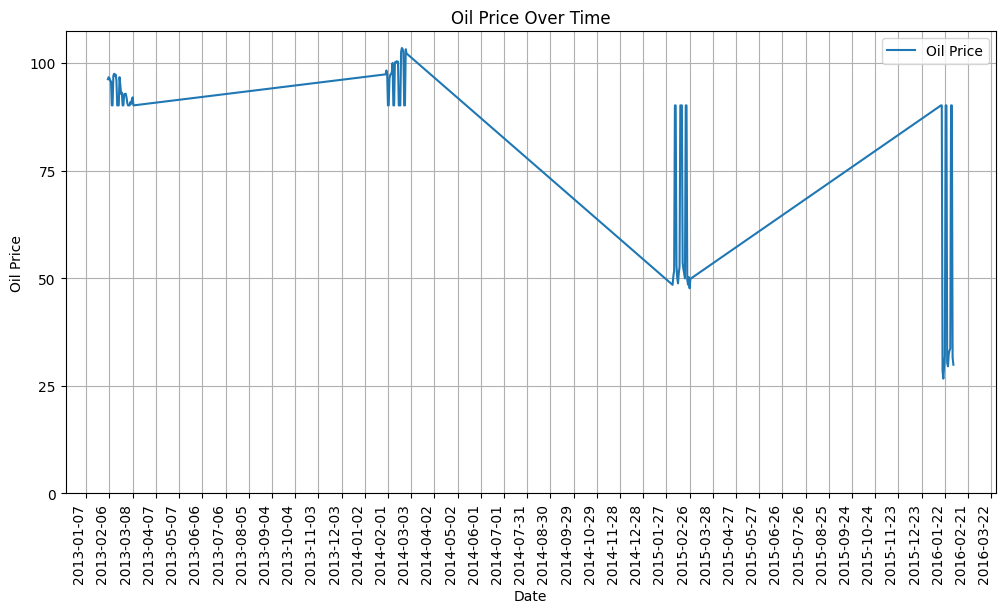

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

trainDataV = pd.DataFrame()

trainDataV['date'] = trainData['date']
trainDataV['dcoilwtico'] = trainData['dcoilwtico']

plt.figure(figsize=(12, 6))
plt.plot(trainDataV['date'], trainDataV['dcoilwtico'], label='Oil Price')

plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')

plt.legend()
plt.grid(True)
plt.yticks([0, 25, 50, 75, 100])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Choose your desired date format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) # Show a tick every 30 days
plt.xticks(rotation=90, ha='right')

# import numpy as np
# plt.yticks(np.linspace(0, 110, 20))

# plt.tight_layout()
plt.show()

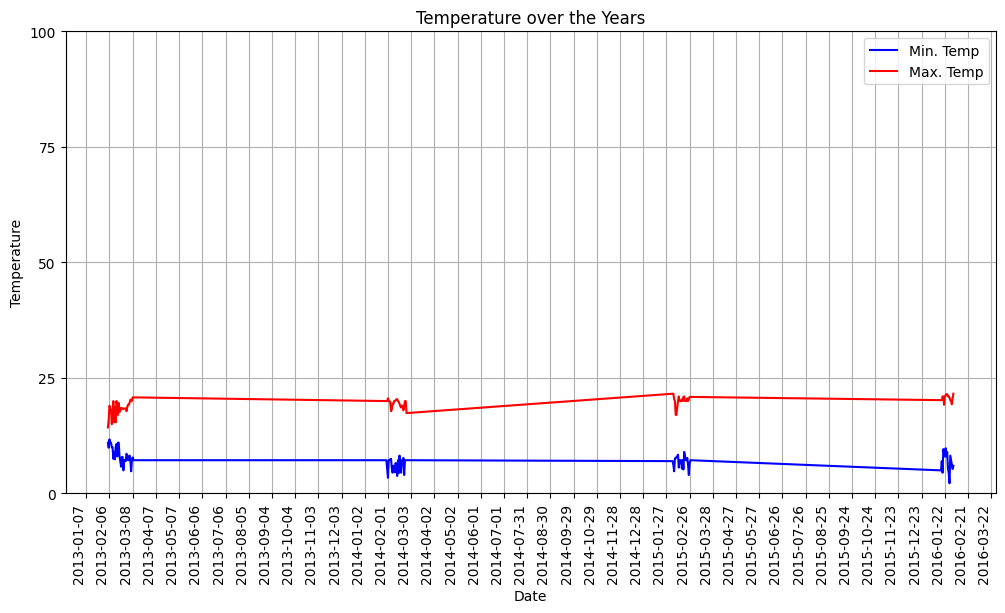

In [44]:
trainDataV = pd.DataFrame()

trainDataV['date'] = trainData['date']
trainDataV['Min Temperature (C)'] = trainData['Min Temperature (C)']
trainDataV['Max Temperature (C)'] = trainData['Max Temperature (C)']

plt.figure(figsize=(12, 6))
plt.plot(trainDataV['date'], trainDataV['Min Temperature (C)'], label='Min. Temp', color='blue')
plt.plot(trainDataV['date'], trainDataV['Max Temperature (C)'], label='Max. Temp', color='red')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over the Years')

plt.legend()
plt.grid(True)
plt.yticks([0, 25, 50, 75, 100])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Choose your desired date format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) # Show a tick every 30 days
plt.xticks(rotation=90, ha='right')

# import numpy as np
# plt.yticks(np.linspace(0, 110, 20))

# plt.tight_layout()
plt.show()